<a href="https://colab.research.google.com/github/Sifath100/Digit-recognition-system/blob/main/digit_classification_using_sklearn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

# we have used sklearn digit dataset
# It loads a different dataset containing images of handwritten digits, where each image is 8x8 pixels in size, and the target variable is an integer representing the actual digit that the image represents (i.e., a digit from 0 to 9). This dataset is often used as a simpler alternative to the MNIST dataset for image classification tasks, as the images are smaller and simpler than the images in the MNIST dataset. The MNIST dataset, on the other hand, contains 28x28 pixel images of handwritten digits and is a more challenging dataset for image classification tasks.

In [ ]:
#loading the dataset
digits=load_digits()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
#now we reshape the data
x_train=x_train.reshape(-1,8,8,1)
x_test=x_test.reshape(-1,8,8,1)

In [ ]:
#the grayscale varies from 0-255 lets normalize it to 0-1
x_train=x_train/255
x_test=x_test/255

In [ ]:
#preprocessing the data is completed

#now we define categories of our classes using to_categorical

y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
#now we select the model / architecture
#adding the layers
model=keras.Sequential(
    [
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]

)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
45/45 [==============================] - 2s 10ms/step - loss: 2.2816 - accuracy: 0.3340 - val_loss: 2.2476 - val_accuracy: 0.4972
Epoch 2/10
45/45 [==============================] - 0s 5ms/step - loss: 2.1778 - accuracy: 0.5365 - val_loss: 2.0687 - val_accuracy: 0.6861
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 1.8873 - accuracy: 0.7349 - val_loss: 1.6632 - val_accuracy: 0.7694
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 1.4072 - accuracy: 0.8072 - val_loss: 1.1597 - val_accuracy: 0.8611
Epoch 5/10
45/45 [==============================] - 0s 5ms/step - loss: 0.9774 - accuracy: 0.8671 - val_loss: 0.8209 - val_accuracy: 0.8472
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 0.7241 - accuracy: 0.8650 - val_loss: 0.6199 - val_accuracy: 0.8944
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.5733 - accuracy: 0.8921 - val_loss: 0.5314 - val_accuracy: 0.9000
Epoch 8/10
45/45 [=

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.9056


In [ ]:
accuracy

0.9055555462837219

In [ ]:
#lets try improving the accuracy

In [ ]:
#increase number of epochs
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
45/45 [==============================] - 1s 16ms/step - loss: 0.3374 - accuracy: 0.9193 - val_loss: 0.3180 - val_accuracy: 0.9111
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2995 - accuracy: 0.9283 - val_loss: 0.2836 - val_accuracy: 0.9222
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.2815 - accuracy: 0.9297 - val_loss: 0.2620 - val_accuracy: 0.9333
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2608 - accuracy: 0.9304 - val_loss: 0.2534 - val_accuracy: 0.9278
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.2419 - accuracy: 0.9339 - val_loss: 0.2181 - val_accuracy: 0.9417
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9408 - val_loss: 0.2078 - val_accuracy: 0.9472
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.2134 - accuracy: 0.9478 - val_loss: 0.2058 - val_accuracy: 0.9417
Epoch 8/50
45/45 [=

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

12/12 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9778


0.9777777791023254

In [ ]:
# lets add more filters
model=keras.Sequential(
    [
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]

)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
45/45 [==============================] - 2s 18ms/step - loss: 2.2594 - accuracy: 0.3159 - val_loss: 2.1382 - val_accuracy: 0.5250
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 1.6931 - accuracy: 0.6340 - val_loss: 1.1532 - val_accuracy: 0.7361
Epoch 3/50
45/45 [==============================] - 0s 9ms/step - loss: 0.8177 - accuracy: 0.7871 - val_loss: 0.6297 - val_accuracy: 0.8222
Epoch 4/50
45/45 [==============================] - 0s 8ms/step - loss: 0.5387 - accuracy: 0.8469 - val_loss: 0.4558 - val_accuracy: 0.8722
Epoch 5/50
45/45 [==============================] - 0s 9ms/step - loss: 0.4157 - accuracy: 0.8824 - val_loss: 0.3997 - val_accuracy: 0.8861
Epoch 6/50
45/45 [==============================] - 0s 8ms/step - loss: 0.3446 - accuracy: 0.8942 - val_loss: 0.2916 - val_accuracy: 0.9139
Epoch 7/50
45/45 [==============================] - 0s 7ms/step - loss: 0.3026 - accuracy: 0.9158 - val_loss: 0.2847 - val_accuracy: 0.9056
Epoch 8/50
45/45 [=

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

12/12 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9722


0.9722222089767456

In [ ]:
#there might be overfitting
#we can prevent overfitting by adding dropout layers
model=keras.Sequential(
    [
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10,activation='softmax')
    ]

)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
45/45 [==============================] - 2s 13ms/step - loss: 2.2805 - accuracy: 0.1740 - val_loss: 2.2079 - val_accuracy: 0.5472
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 1.9477 - accuracy: 0.4558 - val_loss: 1.4471 - val_accuracy: 0.7444
Epoch 3/50
45/45 [==============================] - 0s 8ms/step - loss: 1.2162 - accuracy: 0.6159 - val_loss: 0.8386 - val_accuracy: 0.7806
Epoch 4/50
45/45 [==============================] - 0s 9ms/step - loss: 0.8984 - accuracy: 0.7070 - val_loss: 0.6042 - val_accuracy: 0.8250
Epoch 5/50
45/45 [==============================] - 0s 9ms/step - loss: 0.7383 - accuracy: 0.7731 - val_loss: 0.4977 - val_accuracy: 0.8583
Epoch 6/50
45/45 [==============================] - 0s 9ms/step - loss: 0.6488 - accuracy: 0.7989 - val_loss: 0.4245 - val_accuracy: 0.8750
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.5720 - accuracy: 0.8128 - val_loss: 0.3779 - val_accuracy: 0.8750
Epoch 8/50
45/45 [=

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

12/12 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9778


0.9777777791023254

In [ ]:
#trying data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
45/45 [==============================] - 2s 18ms/step - loss: 0.5430 - accuracy: 0.8323 - val_loss: 0.0708 - val_accuracy: 0.9778
Epoch 2/50
45/45 [==============================] - 1s 16ms/step - loss: 0.4702 - accuracy: 0.8525 - val_loss: 0.0609 - val_accuracy: 0.9806
Epoch 3/50
45/45 [==============================] - 1s 16ms/step - loss: 0.4660 - accuracy: 0.8629 - val_loss: 0.0613 - val_accuracy: 0.9833
Epoch 4/50
45/45 [==============================] - 1s 20ms/step - loss: 0.4117 - accuracy: 0.8768 - val_loss: 0.0582 - val_accuracy: 0.9889
Epoch 5/50
45/45 [==============================] - 1s 26ms/step - loss: 0.4261 - accuracy: 0.8692 - val_loss: 0.0523 - val_accuracy: 0.9889
Epoch 6/50
45/45 [==============================] - 1s 22ms/step - loss: 0.3967 - accuracy: 0.8775 - val_loss: 0.0525 - val_accuracy: 0.9861
Epoch 7/50
45/45 [==============================] - 1s 17ms/step - loss: 0.4023 - accuracy: 0.8754 - val_loss: 0.0453 - val_accuracy: 0.9889
Epoch 8/50
45

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

12/12 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9917


0.9916666746139526

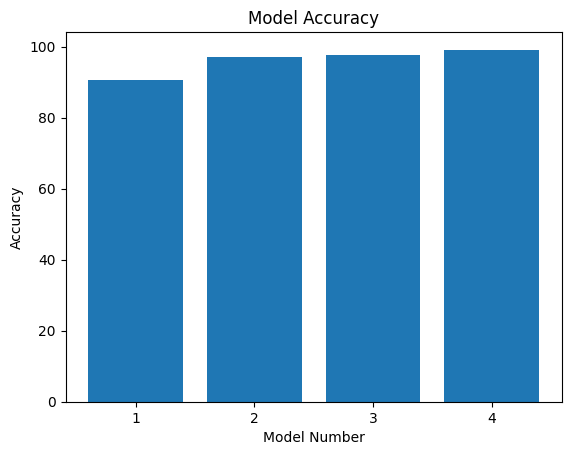

In [ ]:
import matplotlib.pyplot as plt

model_accuracy = {
    1: 90.55555462837219,
    2: 97.22222089767456,
    3: 97.77777791023254,
    4: 99.16666746139526
}

plt.bar(range(len(model_accuracy)), list(model_accuracy.values()), align='center')
plt.xticks(range(len(model_accuracy)), list(model_accuracy.keys()))
plt.ylabel('Accuracy')
plt.xlabel('Model Number')
plt.title('Model Accuracy')

plt.show()


In [ ]:
#final accuracy 99.166


**Now** we will implement the same using the same dataset but different classification technique , we shall use a support vector classifier



In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [ ]:
digits=datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
#we will use a support vector classifier
clf = svm.SVC(gamma=0.001)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [ ]:
clf.fit(X_train, y_train)


SVC(gamma=0.001)

In [ ]:
predicted = clf.predict(X_test)
predicted
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted)*100)

96.88542825361512


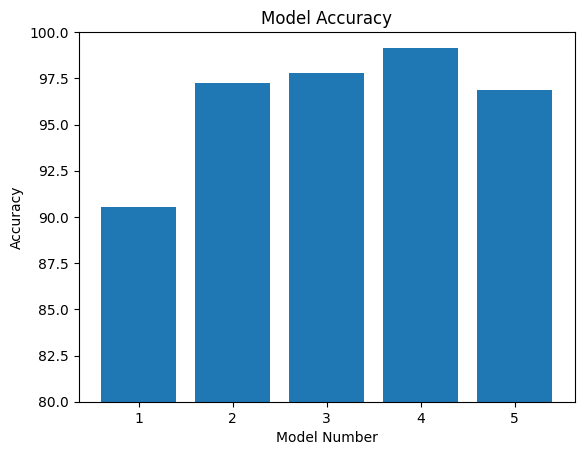

In [ ]:
import matplotlib.pyplot as plt

model_accuracy = {
    1: 90.55555462837219,
    2: 97.22222089767456,
    3: 97.77777791023254,
    4: 99.16666746139526,
    5: 96.88542825361512
}

plt.bar(range(len(model_accuracy)), list(model_accuracy.values()), align='center')
plt.xticks(range(len(model_accuracy)), list(model_accuracy.keys()))
plt.ylabel('Accuracy')
plt.xlabel('Model Number')
plt.title('Model Accuracy')
plt.ylim([80, 100]) # set y-axis limit to show only the range from 80 to 100

plt.show()



In [ ]:
#accuracy obtained is 96.885
